# Lesson 2 - Contribute to human protein atlas with data block api

Try to address the uman protein atlas competition using concepts from lesson2/v3

https://www.kaggle.com/c/human-protein-atlas-image-classification/

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

# Print current version
from fastai.version import __version__
print('fastai version: ', __version__)

fastai version:  1.0.50.dev0


This notebook has been tested with version **1.0.50.dev0**

In [3]:
# Stylish charts
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats("svg")
plt.style.use('ggplot') # gray background grid

# Prerequisite: install kaggle api

Follow instructions on https://github.com/Kaggle/kaggle-api

The main steps are installing the cli ("pip install kaggle") and setting up your credentials on ~/.kaggle/kaggle.json

## Download competition dataset from kaggle

The following steps are valid for almost any kaggle competition.

In [4]:
#Prepare dataset props
competition_name='human-protein-atlas-image-classification' # this is the kaggle dataset name
dest_folder_name='human-protein-atlas' # sub folder of fast.ai data folder

In [5]:
#Prepare params
from fastai.datasets import datapath4file
path = datapath4file(f'{(dest_folder_name)}')
dest_folder = path.as_posix()
print(dest_folder)

/home/ste/.fastai/data/human-protein-atlas


Call kaggle cli to download dataset and unzip it. 

In [6]:
# Call kaggle cli to download competition
#!kaggle competitions download -c {competition_name} -p {dest_folder}

Take a look of what's inside...

In [7]:
!ls -l {dest_folder}

total 18325468
drwxrwxr-x 2 ste ste        4096 mar 17 19:44 models
-rw-rw-r-- 1 ste ste      456391 nov  1 23:23 sample_submission.csv
-rw-rw-r-- 1 ste ste       83404 dic  5 21:50 submission2.csv.gz
-rw-rw-r-- 1 ste ste       85055 dic  6 11:13 submission3.csv.gz
-rw-rw-r-- 1 ste ste       84686 nov 11 20:58 submission.csv.gz
drwxrwxr-x 2 ste ste     3727360 nov  1 23:47 test
-rw-rw-r-- 1 ste ste  4691692691 nov  1 23:35 test.zip
drwxrwxr-x 2 ste ste     9789440 nov  2 00:35 train
-rw-rw-r-- 1 ste ste     1274400 nov  1 23:23 train.csv
-rw-rw-r-- 1 ste ste 14058060316 nov  2 00:11 train.zip


Let's unzip the needed files...

In [8]:
#Unzip
#!mkdir {dest_folder}/train
#!mkdir {dest_folder}/test
#!unzip -o -q {dest_folder}/train.zip -d {dest_folder}/train
#!unzip -o -q {dest_folder}/test.zip -d {dest_folder}/test


# Prepare data

In [9]:
from atlas_util import *
from atlas_data_processing import *

In [10]:
# Create data frame...
(train_data_and_labels_df, train_cols, labels_cols, test_df) = prepareJoinedDataFrame(path)

warinig: labels column is an array of strings...
[['00070df0-bbc3-11e8-b2bc-ac1f6b6435d0' list(['16', '0'])]
 ['000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0' list(['7', '1', '2', '0'])]
 ['000a9596-bbc4-11e8-b2bc-ac1f6b6435d0' list(['5'])]]


In [11]:
display(train_data_and_labels_df.head(5))
display(train_cols)
display(labels_cols)
display(test_df.head(5))

protein  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0   

                                                blue  \
0  /train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_bl...   
1  /train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_bl...   
2  /train/000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_bl...   
3  /train/000c99ba-bba4-11e8-b2b9-ac1f6b6435d0_bl...   
4  /train/001838f8-bbca-11e8-b2bc-ac1f6b6435d0_bl...   

                                               green  \
0  /train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_gr...   
1  /train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_gr...   
2  /train/000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_gr...   
3  /train/000c99ba-bba4-11e8-b2b9-ac1f6b6435d0_gr...   
4  /train/001838f8-bbca-11e8-b2bc-ac1f6b6435d0_gr...   

                                                 red  \
0  /train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_re...   
1  /train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_re...   
2  /train/000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_re...   
3  /train/000c99ba-bba4-11e8-b2b9-ac1f6b6435d0_re...   
4  /train/001838f8-bbca-11e8-b2bc-ac1f6b6435d0_re...   

                                              yellow        labels  
0  /train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_ye...       [16, 0]  
1  /train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_ye...  [7, 1, 2, 0]  
2  /train/000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_ye...           [5]  
3  /train/000c99ba-bba4-11e8-b2b9-ac1f6b6435d0_ye...           [1]  
4  /train/001838f8-bbca-11e8-b2bc-ac1f6b6435d0_ye...          [18]

Index(['protein', 'blue', 'green', 'red', 'yellow'], dtype='object', name='filt')

Index(['protein', 'labels'], dtype='object')

filt                               protein  \
0     00008af0-bad0-11e8-b2b8-ac1f6b6435d0   
1     0000a892-bacf-11e8-b2b8-ac1f6b6435d0   
2     0006faa6-bac7-11e8-b2b7-ac1f6b6435d0   
3     0008baca-bad7-11e8-b2b9-ac1f6b6435d0   
4     000cce7e-bad4-11e8-b2b8-ac1f6b6435d0   

filt                                               blue  \
0     /test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_blu...   
1     /test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_blu...   
2     /test/0006faa6-bac7-11e8-b2b7-ac1f6b6435d0_blu...   
3     /test/0008baca-bad7-11e8-b2b9-ac1f6b6435d0_blu...   
4     /test/000cce7e-bad4-11e8-b2b8-ac1f6b6435d0_blu...   

filt                                              green  \
0     /test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_gre...   
1     /test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_gre...   
2     /test/0006faa6-bac7-11e8-b2b7-ac1f6b6435d0_gre...   
3     /test/0008baca-bad7-11e8-b2b9-ac1f6b6435d0_gre...   
4     /test/000cce7e-bad4-11e8-b2b8-ac1f6b6435d0_gre...   

filt                                                red  \
0     /test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_red...   
1     /test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_red...   
2     /test/0006faa6-bac7-11e8-b2b7-ac1f6b6435d0_red...   
3     /test/0008baca-bad7-11e8-b2b9-ac1f6b6435d0_red...   
4     /test/000cce7e-bad4-11e8-b2b8-ac1f6b6435d0_red...   

filt                                             yellow  
0     /test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_yel...  
1     /test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_yel...  
2     /test/0006faa6-bac7-11e8-b2b7-ac1f6b6435d0_yel...  
3     /test/0008baca-bad7-11e8-b2b9-ac1f6b6435d0_yel...  
4     /test/000cce7e-bad4-11e8-b2b8-ac1f6b6435d0_yel...

**IMPORTANT: the columns of dataframe related to "channels" sholud contains the "relative" image path from the base folder 'path'**

In [12]:
#### DATASET REDUCTION ###
# Select subset to speedup tests
# IMPORTANT: skip this cell in final training
#import random
#samplePct = 1 # All
samplePct = .1
if(samplePct < 1):
    items_count = int(len(train_data_and_labels_df) * samplePct) #! .01 breaks train loop too few
    train_data_and_labels_df = train_data_and_labels_df.sample(items_count)

In [13]:
# View active items in dataset
print('train_data_and_labels_df: ' + str(len(train_data_and_labels_df)))

train_data_and_labels_df: 3107


In [14]:
# Create train/valid set
(x_train, x_valid, y_train, y_valid) = prepareDataset(train_data_and_labels_df,train_cols)

train_and_valid_x:  [['26f77b8c-bbbb-11e8-b2ba-ac1f6b6435d0' '/train/26f77b8c-bbbb-11e8-b2ba-ac1f6b6435d0_blue.png'
  '/train/26f77b8c-bbbb-11e8-b2ba-ac1f6b6435d0_green.png' '/train/26f77b8c-bbbb-11e8-b2ba-ac1f6b6435d0_red.png'
  '/train/26f77b8c-bbbb-11e8-b2ba-ac1f6b6435d0_yellow.png']
 ['e7eddd28-bbc4-11e8-b2bc-ac1f6b6435d0' '/train/e7eddd28-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png'
  '/train/e7eddd28-bbc4-11e8-b2bc-ac1f6b6435d0_green.png' '/train/e7eddd28-bbc4-11e8-b2bc-ac1f6b6435d0_red.png'
  '/train/e7eddd28-bbc4-11e8-b2bc-ac1f6b6435d0_yellow.png']
 ['204b0e6e-bbae-11e8-b2ba-ac1f6b6435d0' '/train/204b0e6e-bbae-11e8-b2ba-ac1f6b6435d0_blue.png'
  '/train/204b0e6e-bbae-11e8-b2ba-ac1f6b6435d0_green.png' '/train/204b0e6e-bbae-11e8-b2ba-ac1f6b6435d0_red.png'
  '/train/204b0e6e-bbae-11e8-b2ba-ac1f6b6435d0_yellow.png']]
train_and_valid_x len:  3107


In [15]:
# # Use data_block api
x_cols = list(train_cols[1:])
print('x_cols: ', x_cols)
y_cols = list(labels_cols[1:2])
print('y_cols: ', y_cols)

x_cols:  ['blue', 'green', 'red', 'yellow']
y_cols:  ['labels']


# Use data_block api

## Custom ItemList
Thanks to the last version of data block api, **it's very simple to customize the ItemList in order to laad multi channel image** with file names provided in the "DataFrame".

NB: to cirrectly integrate with ImageItemList, the complete file name

/home/ste/.fastai/data/huma-protein-atlas/train/xxxxx-yyyy-zzzz-aaaa_red.png

Has been split in 

path = /home/ste/.fastai/data/huma-protein-atlas
variable_part = /train/xxxxx-yyyy-zzzz-aaaa_red.png

The Dataframe contains only the 'variable_part'.

In [16]:
from fastai import *
from fastai.vision import *

import PIL

def openMultiChannelImage(fpArr):
    '''
    Open multiple images and return a single multi channel image
    '''
    mat = None
    nChannels = len(fpArr)
    for i,fp in enumerate(fpArr):
        img = PIL.Image.open(fp)
        chan = pil2tensor(img, dtype='float').div_(255)
        if(mat is None):
            mat = torch.zeros((nChannels,chan.shape[1],chan.shape[2]))
        mat[i,:,:]=chan
    return Image(mat)
    
class MultiChannelImageList(ImageList):
    def open(self, fn):
        return openMultiChannelImage(fn)

In [17]:
# Test & sample usage
def test_openMultiChannelImage():
    # Usage sample
    v = array(['7d4c260c-bbb3-11e8-b2ba-ac1f6b6435d0', # Object reference - not used here
        (str(path) + '/train/7d4c260c-bbb3-11e8-b2ba-ac1f6b6435d0_blue.png'),
        (str(path) + '/train/7d4c260c-bbb3-11e8-b2ba-ac1f6b6435d0_green.png'),
        (str(path) + '/train/7d4c260c-bbb3-11e8-b2ba-ac1f6b6435d0_red.png'),
        (str(path) + '/train/7d4c260c-bbb3-11e8-b2ba-ac1f6b6435d0_yellow.png')])

    ret = openMultiChannelImage(v[1:])
    #display(ret)
    shp = np.array(ret.data.shape)
    assert 4 == shp[0]
    assert 512 == shp[1]
    assert 512 == shp[2]

test_openMultiChannelImage()

## Use MultiChannelImageItemList

In [18]:
il = MultiChannelImageList.from_df(path=path, df=train_data_and_labels_df, cols=x_cols)

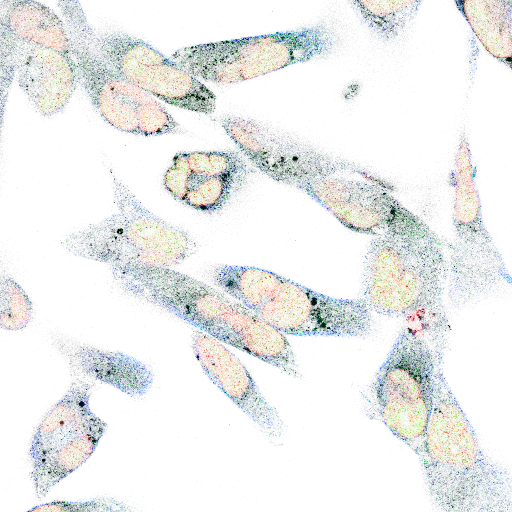

In [19]:
il.get(0)

In [20]:
ils = il.split_by_rand_pct()

In [21]:
ils2 = ils.label_from_df(cols=y_cols) # train_data_and_labels_df: has both x and y!! 

In [22]:
# Test set
test_items = MultiChannelImageList.from_df(path=path, df=test_df, cols=x_cols)

In [23]:
ils3 = ils2.add_test(items=test_items)

In [24]:
tfms = get_transforms(flip_vert=True, do_flip=True, 
                      max_rotate=30, max_zoom=1.01, max_lighting=None, max_warp=None, 
                      p_affine=0., p_lighting=0.)

In [25]:
size=384

In [26]:
ils4 = ils3.transform(tfms, size=size) #add tfms & size

## Databunch

In [27]:
bs=28 # Test with 8GB memory 

In [28]:
data = ils4.databunch(bs=bs)

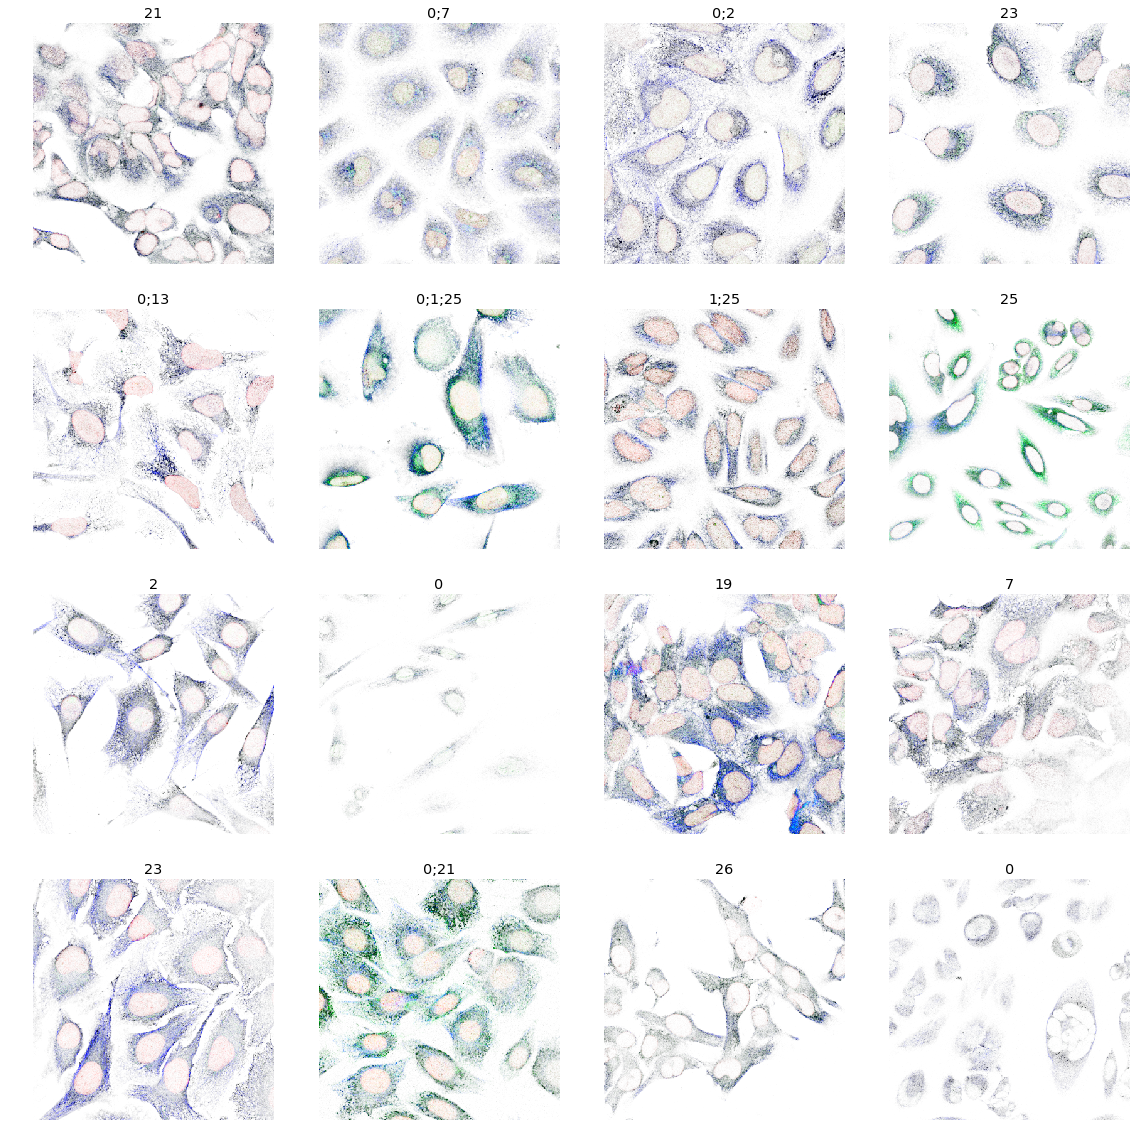

In [29]:
data.show_batch(rows=4)

# Train network!
Let's learn something...

## Prepare learner

In [30]:
f1_score = partial(fbeta, thresh=0.5, beta=1)

In [31]:
learn = cnn_learner(data, models.resnet50, metrics=[f1_score,accuracy_thresh],pretrained=True)

## Adapt first layer of learner to accept nChannels=4 images

In [32]:
# Make batches: take a number and spli in batches
def make_batches(x,bs):
    '''
    Sample make_batches(11,3) = [3,3,3,2]
    '''
    if(x<=bs):
        return [min(x,bs)]
    else:
        return [bs] + make_batches(x-bs,bs)

# test
print(make_batches(11,3))
print(make_batches(4,3))

[3, 3, 3, 2]
[3, 1]


In [33]:
def create_new_weights(original_weights,nChannels):
    dst = torch.zeros(64,4,7,7)
    #Repeat original weights up to fill dimension
    start=0;
    for i in make_batches(nChannels,3):
        #print('dst',start,start+i, ' = src',0,i)
        dst[:,start:start+i,:,:]=original_weights[:,:i,:,:]
        start = start+i
    return dst
    
# Sample usage
tmp=learn.model[0][0].weight.clone()    
print(create_new_weights(tmp,4)[0,:,1,1])

tensor([0.0058, 0.0189, 0.0042, 0.0058])


In [34]:
def adapt_first_layer(src_model, nChannels):
    '''
    Change first layer of network to accomodate new channels
    '''
    # save original
    original_weights = src_model[0][0].weight.clone()


    # create new repeating existent weights channelwise
    new_weights = create_new_weights(original_weights,nChannels)

    # create new layes
    new_layer = nn.Conv2d(nChannels,64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    new_layer.weight = nn.Parameter(new_weights)

    # Replace layer and put to gpu.
    src_model[0][0] = new_layer
    src_model.cuda();

In [35]:
nChannels=4

# Alter existing model
adapt_first_layer(learn.model,nChannels)

print('First layer:', learn.model[0][0])
print('First layer weights shape:', learn.model[0][0].weight.shape)
print('First layer weights sample:', learn.model[0][0].weight[0,:,0,0])

First layer: Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
First layer weights shape: torch.Size([64, 4, 7, 7])
First layer weights sample: tensor([ 0.0133, -0.0185, -0.0183,  0.0133], device='cuda:0',
       grad_fn=<SelectBackward>)


## Start Training...

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


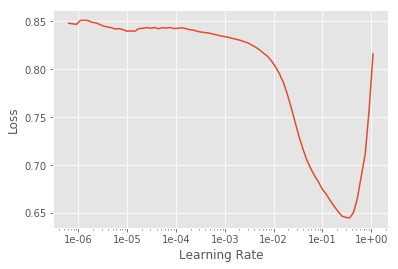

In [36]:
learn.lr_find()
learn.recorder.plot()

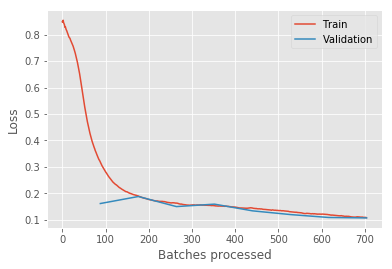

In [37]:
learn.fit_one_cycle(8,max_lr=slice(1e-2, 3e-2))
learn.recorder.plot_losses()

In [38]:
#learn.save("resnet-50-348-b0")

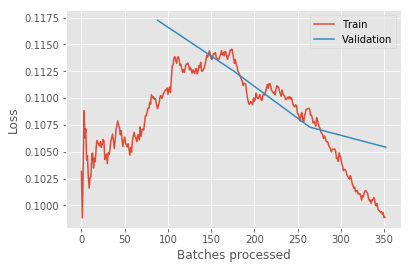

In [39]:
learn.fit_one_cycle(4,max_lr=slice(1e-3,1e-2))
learn.recorder.plot_losses()

In [41]:
#learn.save("resnet-50-348-b1")

In [40]:
learn.unfreeze()

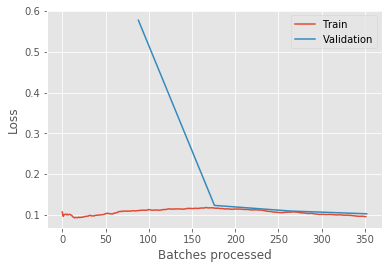

In [41]:
learn.fit_one_cycle(4,max_lr=slice(1e-4,1e-3))
learn.recorder.plot_losses()

In [42]:
#learn.save("resnet-50-348-b2")

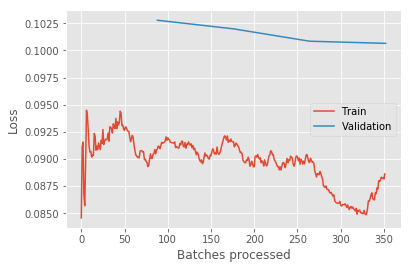

In [43]:
learn.fit_one_cycle(4,max_lr=slice(1e-5,1e-4))
learn.recorder.plot_losses()

In [41]:
#learn.save("resnet-50-348-b3")

# Increase the resolution...

In [44]:
#learn.load("resnet-50-348-b2")

Learner(data=ImageDataBunch;
Train: LabelList
y: MultiCategoryList (24858 items)
[MultiCategory 16;0, MultiCategory 5, MultiCategory 1, MultiCategory 18, MultiCategory 25;2]...
Path: /home/ste/.fastai/data/human-protein-atlas
x: MultiChannelImageItemList (24858 items)
[Image (4, 512, 512), Image (4, 512, 512), Image (4, 512, 512), Image (4, 512, 512), Image (4, 512, 512)]...
Path: /home/ste/.fastai/data/human-protein-atlas;
Valid: LabelList
y: MultiCategoryList (6214 items)
[MultiCategory 21, MultiCategory 5;2, MultiCategory 7, MultiCategory 25;2;0, MultiCategory 0;21]...
Path: /home/ste/.fastai/data/human-protein-atlas
x: MultiChannelImageItemList (6214 items)
[Image (4, 512, 512), Image (4, 512, 512), Image (4, 512, 512), Image (4, 512, 512), Image (4, 512, 512)]...
Path: /home/ste/.fastai/data/human-protein-atlas;
Test: LabelList
y: MultiCategoryList (11702 items)
[MultiCategory 16;0, MultiCategory 16;0, MultiCategory 16;0, MultiCategory 16;0, MultiCategory 16;0]...
Path: /home/ste/

In [44]:
# New data
ils4B = ils3.transform(tfms, size=512)
dataB = ils4B.databunch(bs=bs//2)
#data2.normalize(protein_stats)

# substitute
learn.data = dataB

In [45]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: CUDA out of memory. Tried to allocate 2.16 GiB (GPU 0; 7.93 GiB total capacity; 5.01 GiB already allocated; 2.16 GiB free; 64.25 MiB cached)

In [ ]:
learn.fit_one_cycle(8,max_lr=slice(1e-5,5e-4))
learn.recorder.plot_losses()

No improvements...

In [ ]:
learn.load("resnet-50-348-b3");

## Results

In [42]:
interp = ClassificationInterpretation.from_learner(learn)

In [43]:
interp.probs

tensor([[7.8672e-01, 5.1457e-04, 9.4646e-10,  ..., 6.3354e-04, 1.1265e-07,
         8.7282e-09],
        [7.4821e-01, 5.6021e-03, 8.6071e-06,  ..., 2.1084e-02, 3.5473e-05,
         1.4843e-05],
        [8.7137e-01, 5.3018e-04, 4.0129e-06,  ..., 3.4892e-01, 6.0224e-09,
         1.0230e-05],
        ...,
        [9.1179e-01, 9.3617e-01, 2.4914e-06,  ..., 2.8104e-02, 9.8492e-06,
         1.0348e-05],
        [9.4702e-01, 3.8255e-03, 3.9756e-05,  ..., 9.1786e-01, 6.1346e-06,
         1.0383e-04],
        [1.2510e-02, 1.8270e-03, 1.3268e-05,  ..., 2.3837e-02, 8.5227e-05,
         1.0238e-05]])

## Create submission

The following steps shows how to process test images and create a submission.

In [44]:
print('Test samples (4 image per sample): ',len(test_df.values))

Test samples (4 image per sample):  11702


In [45]:
preds = learn.TTA(scale=1.0, ds_type=DatasetType.Test, with_loss=False)[0]

Total time: 10:41



In [47]:
# Find file name
preds_name = data.test_ds.xtra['protein'].tolist()
print('preds_name :',preds_name[:10])
print('preds_name len: ',len(preds_name))

preds_name : ['00008af0-bad0-11e8-b2b8-ac1f6b6435d0', '0000a892-bacf-11e8-b2b8-ac1f6b6435d0', '0006faa6-bac7-11e8-b2b7-ac1f6b6435d0', '0008baca-bad7-11e8-b2b9-ac1f6b6435d0', '000cce7e-bad4-11e8-b2b8-ac1f6b6435d0', '00109f6a-bac8-11e8-b2b7-ac1f6b6435d0', '001765de-bacd-11e8-b2b8-ac1f6b6435d0', '0018641a-bac9-11e8-b2b8-ac1f6b6435d0', '00200f22-bad7-11e8-b2b9-ac1f6b6435d0', '0026f154-bac6-11e8-b2b7-ac1f6b6435d0']
preds_name len:  11702


In [48]:
# Preds vals...
preds_val = preds.numpy()
print('preds_val: ',preds_val[0,:])
print('preds_name len: ',len(preds_val))

preds_val:  [1.601450e-01 2.975368e-03 4.086638e-08 8.887597e-04 4.738249e-04 4.652316e-05 3.340729e-04 8.233318e-06 3.214299e-03
 8.298848e-05 3.287412e-04 3.521052e-03 9.842726e-01 1.653363e-06 1.652811e-03 1.142769e-03 2.544530e-03 8.247950e-05
 6.258987e-03 4.024272e-05 6.111631e-10 9.971716e-03 8.477112e-04 1.533037e-03 2.442088e-04 2.563342e-03 3.606479e-07
 1.357712e-07]
preds_name len:  11702


In [49]:
# Treshold prediction andh choose class
def tresholdPreds(v, treshold_percent=.5):
    # min max scale
    v_min = min(v)
    v_max = max(v)
    delta = v_max - v_min
    treshold = v_min + (delta*treshold_percent)
    mask=(v>=treshold)
    ret = np.copy(v)
    ret[mask]=1
    ret[np.logical_not(mask)]=0
    return ret
    
v=array([4.997809e-02, 5.959284e-02, 1.161887e-01, 1.736579e-01, 1.247338e-01, 8.583629e-01, 3.141005e-02, 1.493369e-02,
       2.666322e-02, 1.458077e-01, 2.023079e-02, 5.351456e-02, 3.180511e-02, 6.246457e-02, 2.026248e-02, 7.351419e-03,
       1.916871e-02, 1.439827e-01, 2.866915e-03, 1.080358e-03, 3.390579e-04, 1.785136e-02, 5.941750e-03, 8.804068e-03,
       3.890769e-04, 1.764834e-04, 1.054737e-04, 5.003021e-04])
print('Sample treshold: ', tresholdPreds(v,.75))
print('Sample treshold: ', tresholdPreds(v,.05))

Sample treshold:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample treshold:  [1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [50]:
preds_tresh = list(map(lambda v: tresholdPreds(v,.75), preds_val))
print('preds_tresh: ',preds_tresh[:10])

preds_tresh:  [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
      dtype=f

In [51]:
# Convert predictions in classes list
def predictionsTreshToClasses(v, classes):
    return np.array(classes)[v==1]

# Sample
v=array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
clss=['7', '1', '5', '11', '25', '0', '21', '18', '23', '2', '16', '19', '22', '3', '13', '14', '12', '4', '6', '17', '8', '26', '24', '20', '27', '9', '10', '15']
print(predictionsTreshToClasses(v,clss))
#assert array(['25' '0' '13'])==predictionsTreshToClasses(v,clss), "Unit test"

['25' '0' '13']


In [52]:
# Convert classes list to string
def classesToString(v, sep):
    return sep.join(list(v))

# Sample
v=array(['25','0','13'])
print(classesToString(v,' '))


25 0 13


In [53]:
preds_classes=list(map(lambda v: classesToString(predictionsTreshToClasses(v,data.classes),' '),preds_tresh))
print('preds_classes: ',preds_classes[30:40])
print('preds_classes len: ',len(preds_classes))

preds_classes:  ['21', '0', '17', '5', '0 7', '13', '25', '3', '0 21', '1']
preds_classes len:  11702


## Analyze predictions

Take a look at predictions befor to create submission.

In [54]:
df = pd.DataFrame({'Id': preds_name, 'Predicted': preds_classes})
df.head()

Id Predicted
0  00008af0-bad0-11e8-b2b8-ac1f6b6435d0         2
1  0000a892-bacf-11e8-b2b8-ac1f6b6435d0         5
2  0006faa6-bac7-11e8-b2b7-ac1f6b6435d0      0 25
3  0008baca-bad7-11e8-b2b9-ac1f6b6435d0         0
4  000cce7e-bad4-11e8-b2b8-ac1f6b6435d0        23

In [55]:
# Create data to load image
tmp = df.copy()
tmp.columns=['protein','Predicted']
display(tmp.head(2))
joined = test_df.join(tmp,rsuffix="_tmp")
display(joined.head(2))

protein Predicted
0  00008af0-bad0-11e8-b2b8-ac1f6b6435d0         2
1  0000a892-bacf-11e8-b2b8-ac1f6b6435d0         5

protein  \
0  00008af0-bad0-11e8-b2b8-ac1f6b6435d0   
1  0000a892-bacf-11e8-b2b8-ac1f6b6435d0   

                                                blue  \
0  /test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_blu...   
1  /test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_blu...   

                                               green  \
0  /test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_gre...   
1  /test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_gre...   

                                                 red  \
0  /test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_red...   
1  /test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_red...   

                                              yellow  \
0  /test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_yel...   
1  /test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_yel...   

                            protein_tmp Predicted  
0  00008af0-bad0-11e8-b2b8-ac1f6b6435d0         2  
1  0000a892-bacf-11e8-b2b8-ac1f6b6435d0         5

In [56]:
joined[pd.Index(['blue','green','red','yellow'])].head(2)

blue  \
0  /test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_blu...   
1  /test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_blu...   

                                               green  \
0  /test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_gre...   
1  /test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_gre...   

                                                 red  \
0  /test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_red...   
1  /test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_red...   

                                              yellow  
0  /test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_yel...  
1  /test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_yel...

'00008af0-bad0-11e8-b2b8-ac1f6b6435d0 : 2'

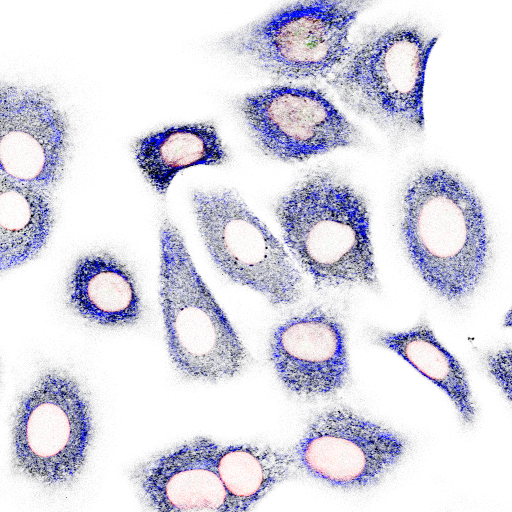

'0000a892-bacf-11e8-b2b8-ac1f6b6435d0 : 5'

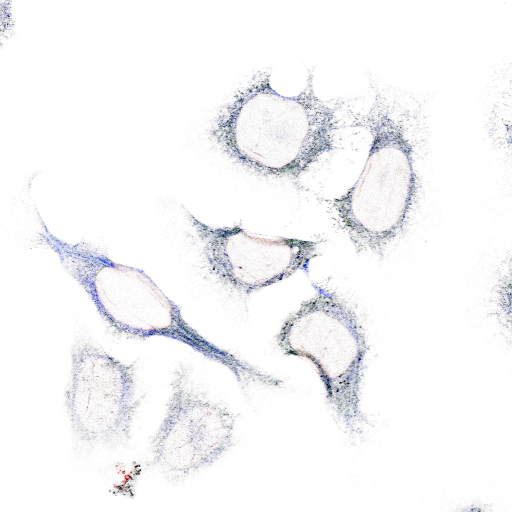

'0006faa6-bac7-11e8-b2b7-ac1f6b6435d0 : 0 25'

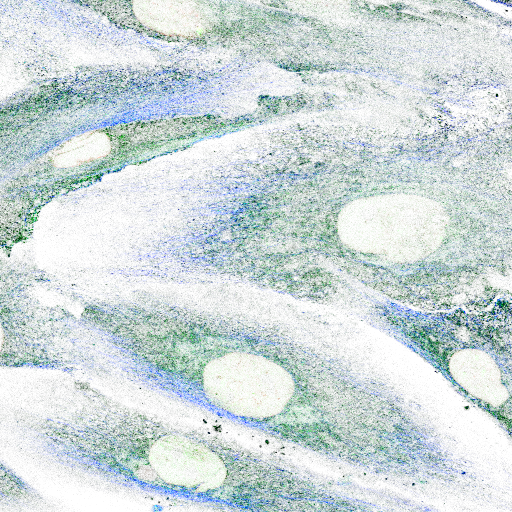

In [57]:
import IPython
def showResults():
    # Create data to load image
    tmp = df.copy()
    tmp.columns=['protein','Predicted']
    #display(tmp.head(2))
    joined = test_df.join(tmp,rsuffix="_tmp")
    #display(joined.head(5))    
    for index, row in joined[0:3].iterrows():
        display(row['protein'] + ' : ' + row['Predicted'])
        img = openMultiChannelImage(row[1:5].apply(lambda x: str(path) + x))
        display(img)
        
showResults()

In [58]:
subm = df
display(subm.head(3))

Id Predicted
0  00008af0-bad0-11e8-b2b8-ac1f6b6435d0         2
1  0000a892-bacf-11e8-b2b8-ac1f6b6435d0         5
2  0006faa6-bac7-11e8-b2b7-ac1f6b6435d0      0 25

In [59]:
subm_file_name = (path/'submission3.csv').as_posix()
print(subm_file_name)

/home/ste/.fastai/data/human-protein-atlas/submission3.csv


In [60]:
# Create submission
subm.to_csv(subm_file_name + '.gz', index=False, compression='gzip')

In [61]:
# Submit to kaggle
!kaggle competitions submit -f {subm_file_name}.gz -m "Retrain from scratch" {competition_name}

100%|██████████████████████████████████████| 83.1k/83.1k [00:03<00:00, 27.2kB/s]
Successfully submitted to Human Protein Atlas Image Classification

# Kaggle Results

Submitting to kaggle this result we've got a public score of .319 and rank of 525/736.
There is a lot of room for improvements!